# Notebook to visualize training transforms for SELMA3D data

## Setup

In [1]:
# imports
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import random 
import sys
import tifffile as tiff
import torch

from monai.transforms import (
    CastToTyped,
    Compose,
    EnsureChannelFirstd,
    MapTransform,
    RandAffined,
    RandFlipd,
    RandGaussianNoised,
    RandGaussianSmoothd,
    RandRotate90d,
    RandScaleIntensityd,
    RandShiftIntensityd,
    ScaleIntensityRangePercentilesd,
    ThresholdIntensityd,
    ToTensord
)
from monai.data import Dataset, DataLoader


In [2]:
# clear pycache to ensure reloading functions
for pycache in glob.glob("/home/ads4015/ssl_project/preprocess_patches/**/__pycache__", recursive=True):
    os.system(f"rm -r {pycache}")
    

In [3]:
# get functions from other files
sys.path.append('/home/ads4015/ssl_project/preprocess_patches/src')
from wu_visualization_functions import ClampIntensityd, get_train_transforms, get_val_transforms, get_load_transforms, visualize_patches


In [4]:
# set seed for reproducibility
random.seed(100)


In [5]:
# define paths to data and create directories
data_root = '/midtier/paetzollab/scratch/ads4015/all_wu_brain_patches'

# get list of sample folders
sample_folders = ['01_AA1-PO-C-R45',
                  '02_AZ10-SR3B-6_A',
                  '03_AJ12-LG1E-n_A',
                  '04_AE2-WF2a_A',
                  '05_CH1-PCW1A_A']

# train ratio (80% train, 20% val)
train_ratio = 0.8


## Functions

In [6]:
# define transforms
train_transforms = get_train_transforms()
val_transforms = get_val_transforms()
load_transforms = get_load_transforms()


## Gather and split data

In [7]:
from glob import glob

# create dict to store train/val splits for each sample
files_by_sample = {}

# split into train and val sets
for sample_id in sample_folders:
    folder = os.path.join(data_root, sample_id, 'input')
    files = glob(os.path.join(folder, '*.nii.gz'))
    random.shuffle(files)
    split_idx = int(train_ratio * len(files))
    files_by_sample[sample_id] = {
        'train': [(sample_id, f) for f in files[:split_idx]],
        'val': [(sample_id, f) for f in files[split_idx:]]
    }


## Visualize transforms

In [8]:
# define number of patches to visualize
num_patches = 3



--- TRAIN PATCHES ---


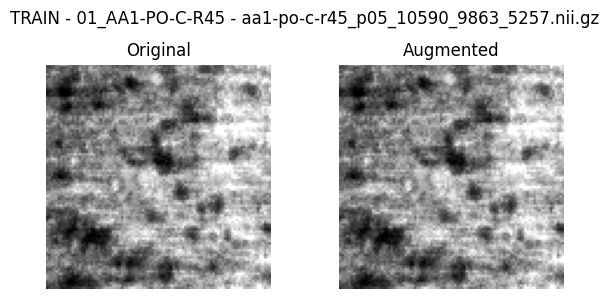

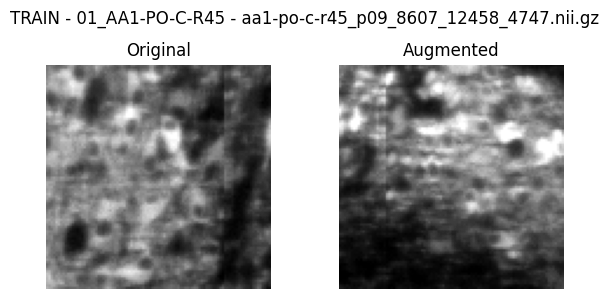

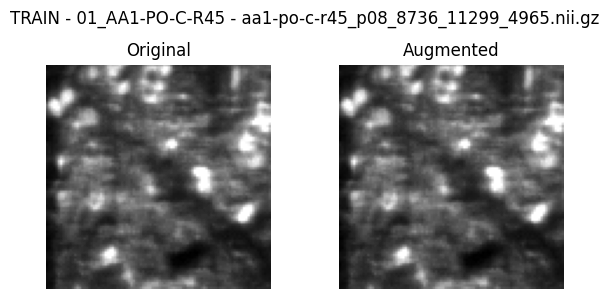

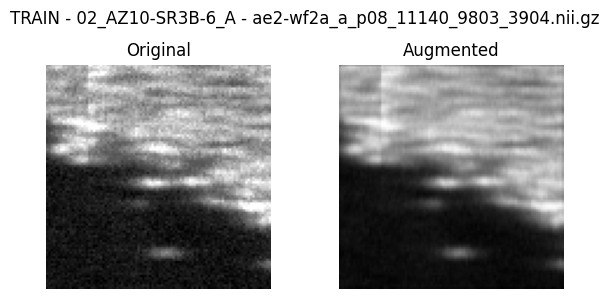

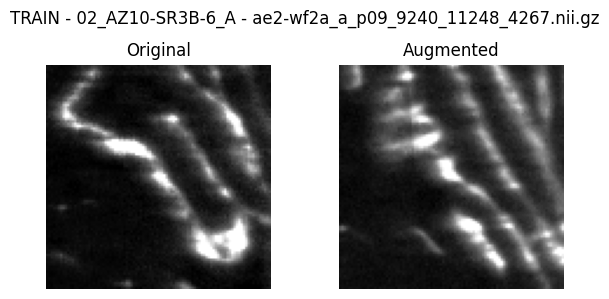

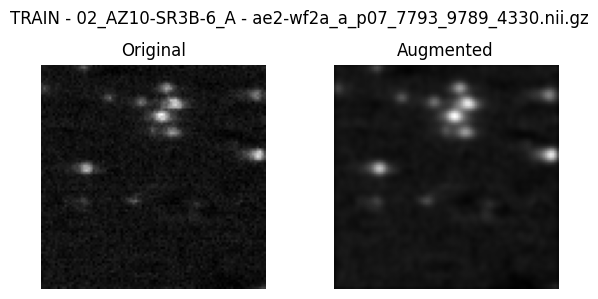

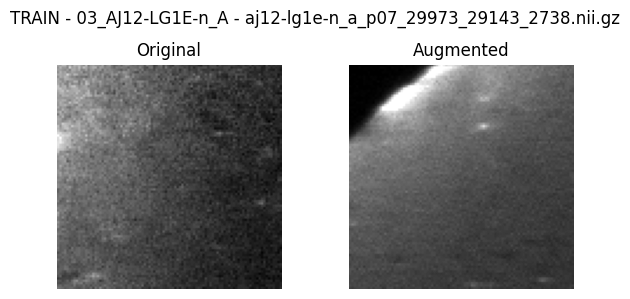

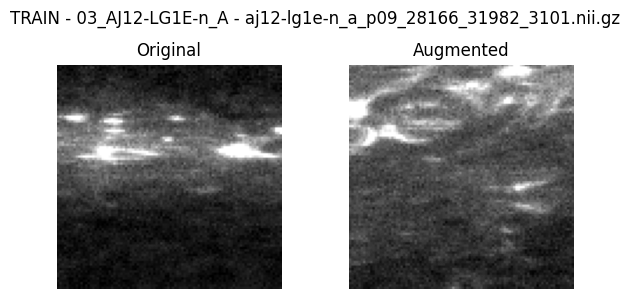

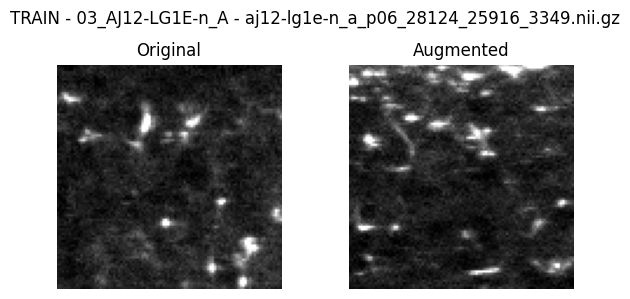

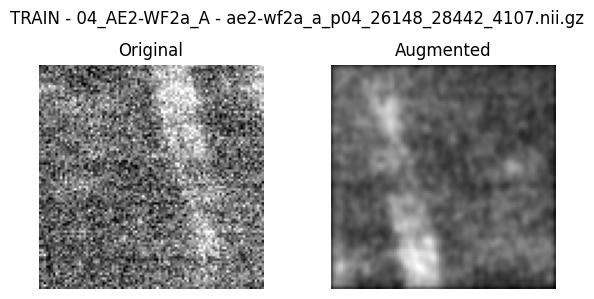

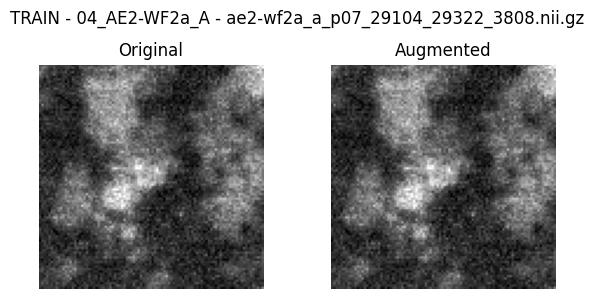

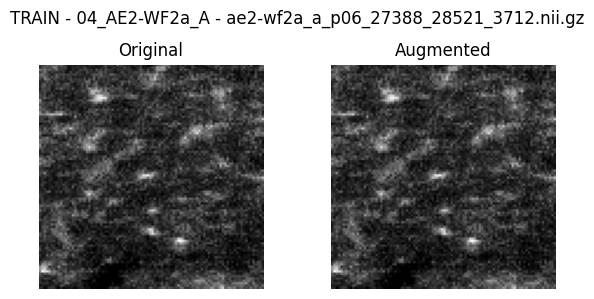

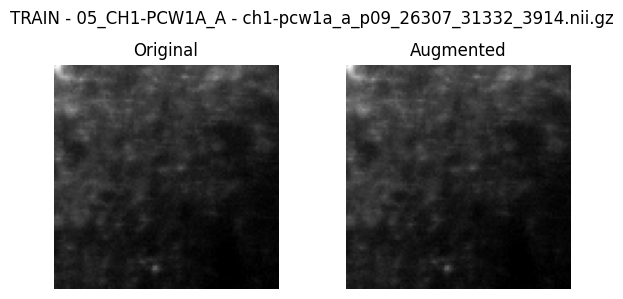

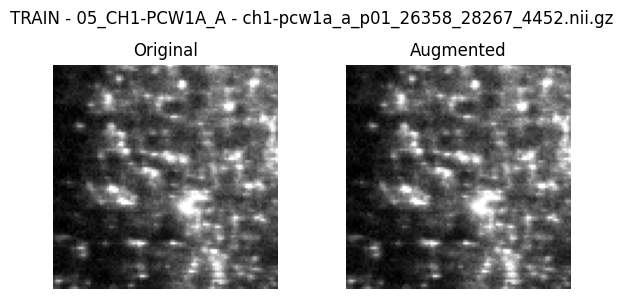

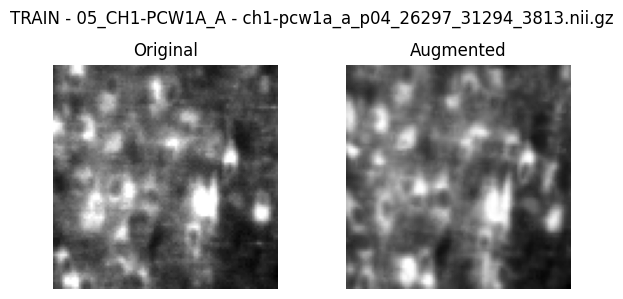


--- VAL PATCHES ---


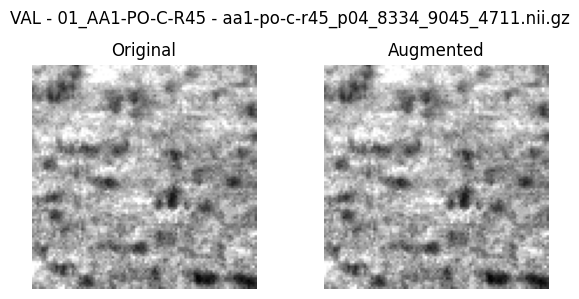

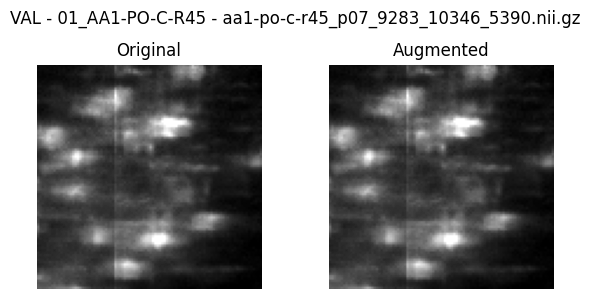

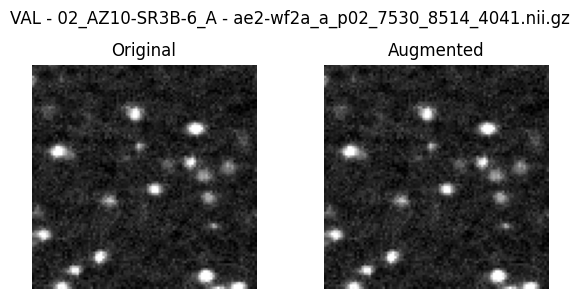

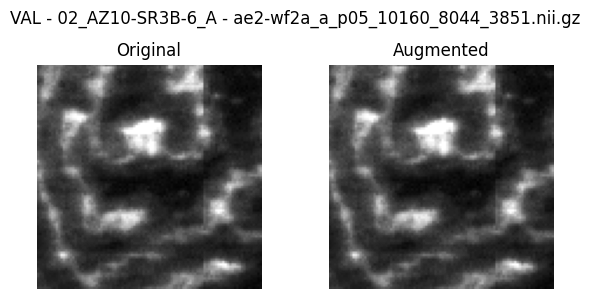

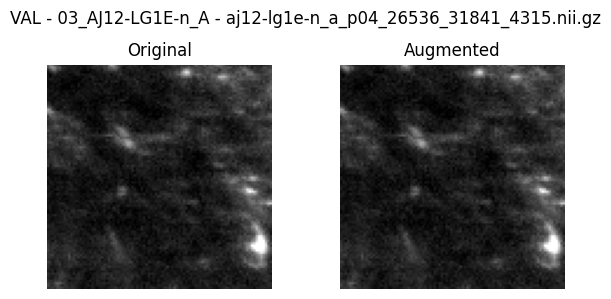

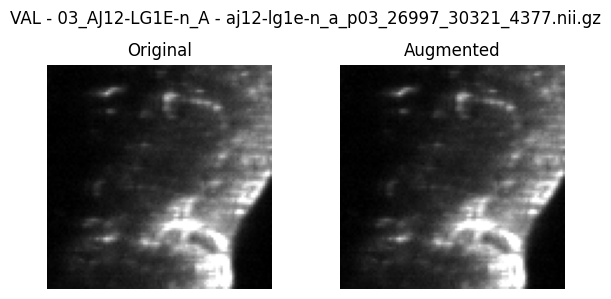

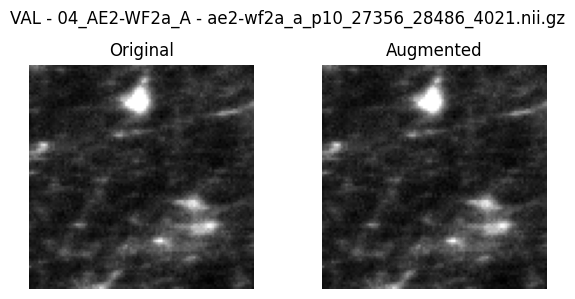

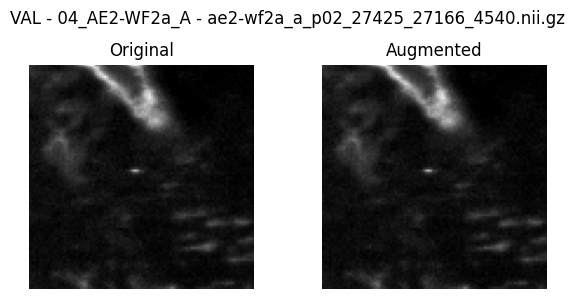

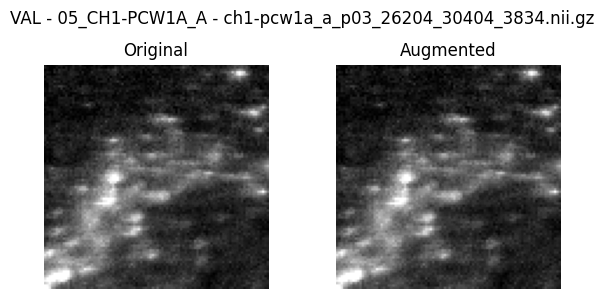

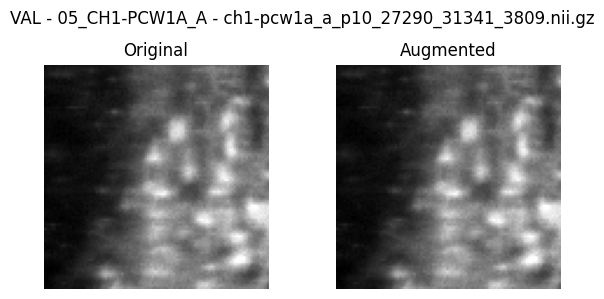

Visualization complete!


In [9]:
# visualize patches for each sample for each phase
for phase in ['train', 'val']:

    # determine phase
    print(f'\n--- {phase.upper()} PATCHES ---')
    tv_transforms = train_transforms if phase == 'train' else val_transforms

    # create dict of filepaths
    for sample_id in sample_folders:
        split = files_by_sample[sample_id][phase][:num_patches]
        for _, filepath in split:
            d = {'image': filepath}

            # load images, apply transforms and visualize
            try:
                loaded = load_transforms(d)
                original = loaded['image']
                augmented = tv_transforms(loaded)['image']
                visualize_patches(original.numpy(), augmented.cpu().numpy(), f'{phase.upper()} - {sample_id} - {os.path.basename(filepath)}')

            except Exception as e:
                print(f'Failed to process {filepath}: {e}')

print('Visualization complete!')
                
